# Introduction to lightkurve - binning data

This notebook covers how to bin data.

Notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you runa cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a # is ignored by the code, so all comments are shown following # (except in this cell because I made this into a text cell)

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

In [5]:
# define TIC e.g. TIC 284475976 (WASP-48 b)
# make sure to put quotation marks ('' or "") around it (the font should change to red)
# !!! change the TIC id to look at a different target

TIC = 'TIC 55525572' # !! CHANGE THIS for a different target

In [6]:
# search the available data and select data from a couple of sectors

'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

note, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select them using: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'
2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)
3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')
4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'
5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'
'''

available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[1:4] # !! CHANEG THIS (see above)

# download the selected data and 'stitch' the data from the different sectors together (which also normalizes the data)
lc_collection = available_data_select.download_all().stitch()


<IPython.core.display.Javascript object>


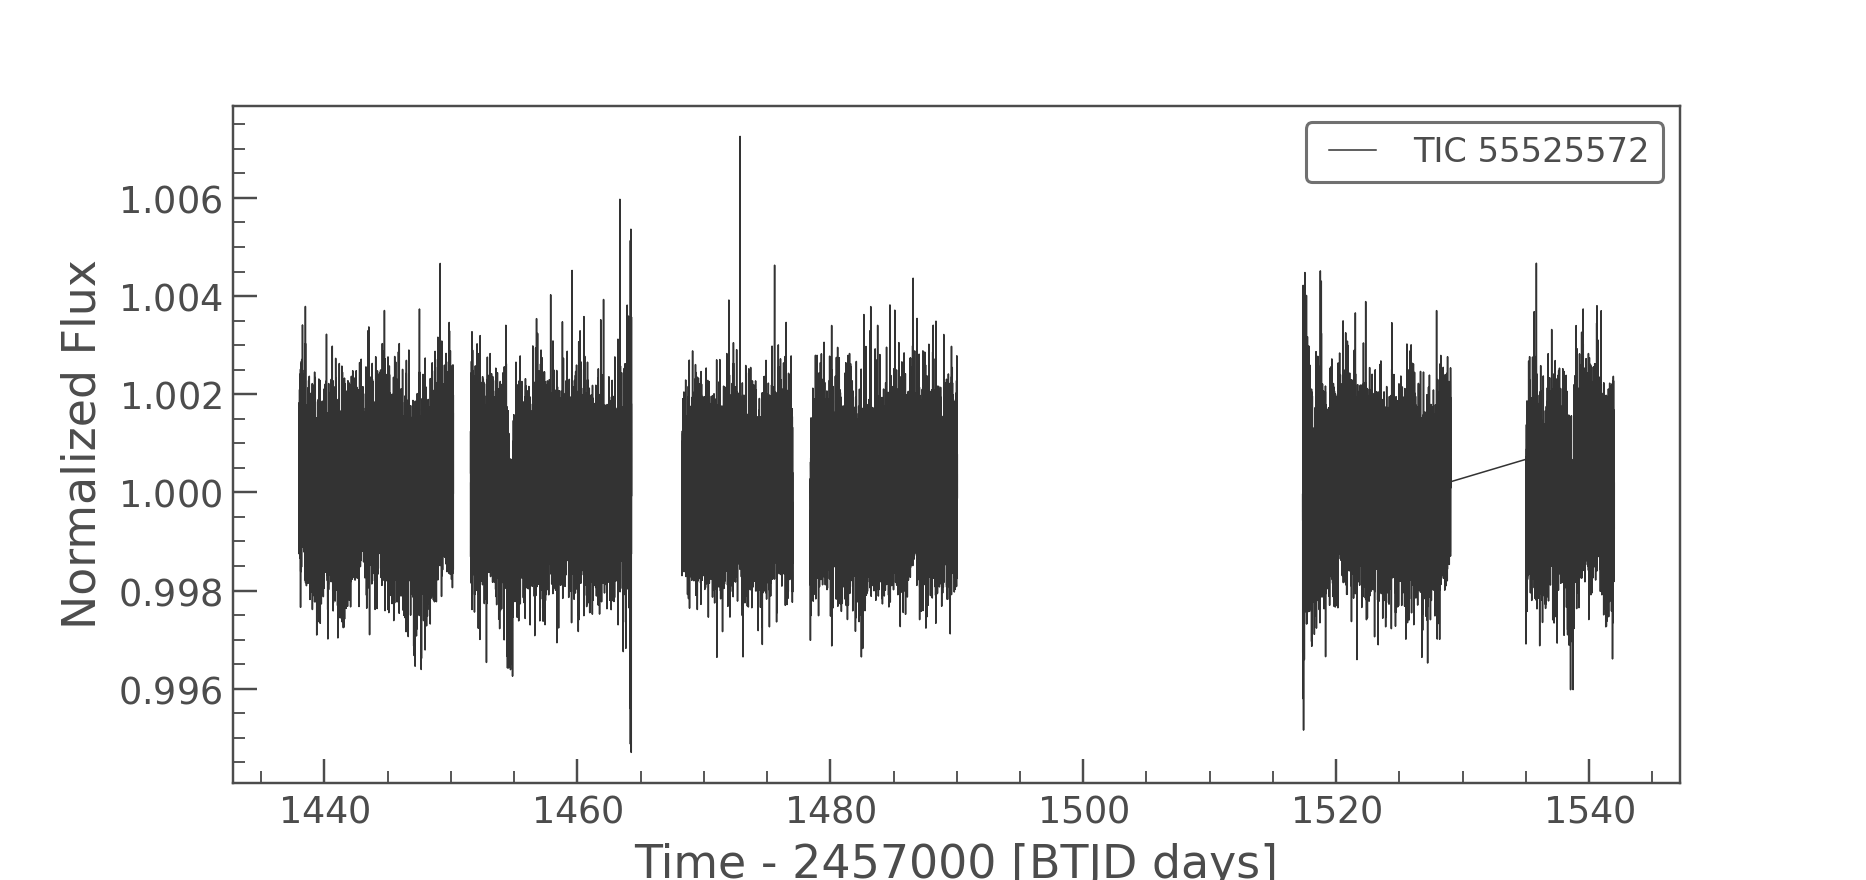

In [7]:
lc_collection.plot()

In [8]:
# define the size of the bin. This needs to be in units of days
# I like to think in minutes, so I have divided 15 (minutes) by 24 (hours/day) and 60 (minutes/hour) to get it into units of days
bin_time = 15/24/60

# bin the data with this line of code
lc_collection_binned = lc_collection.bin(15/24/60)

<IPython.core.display.Javascript object>


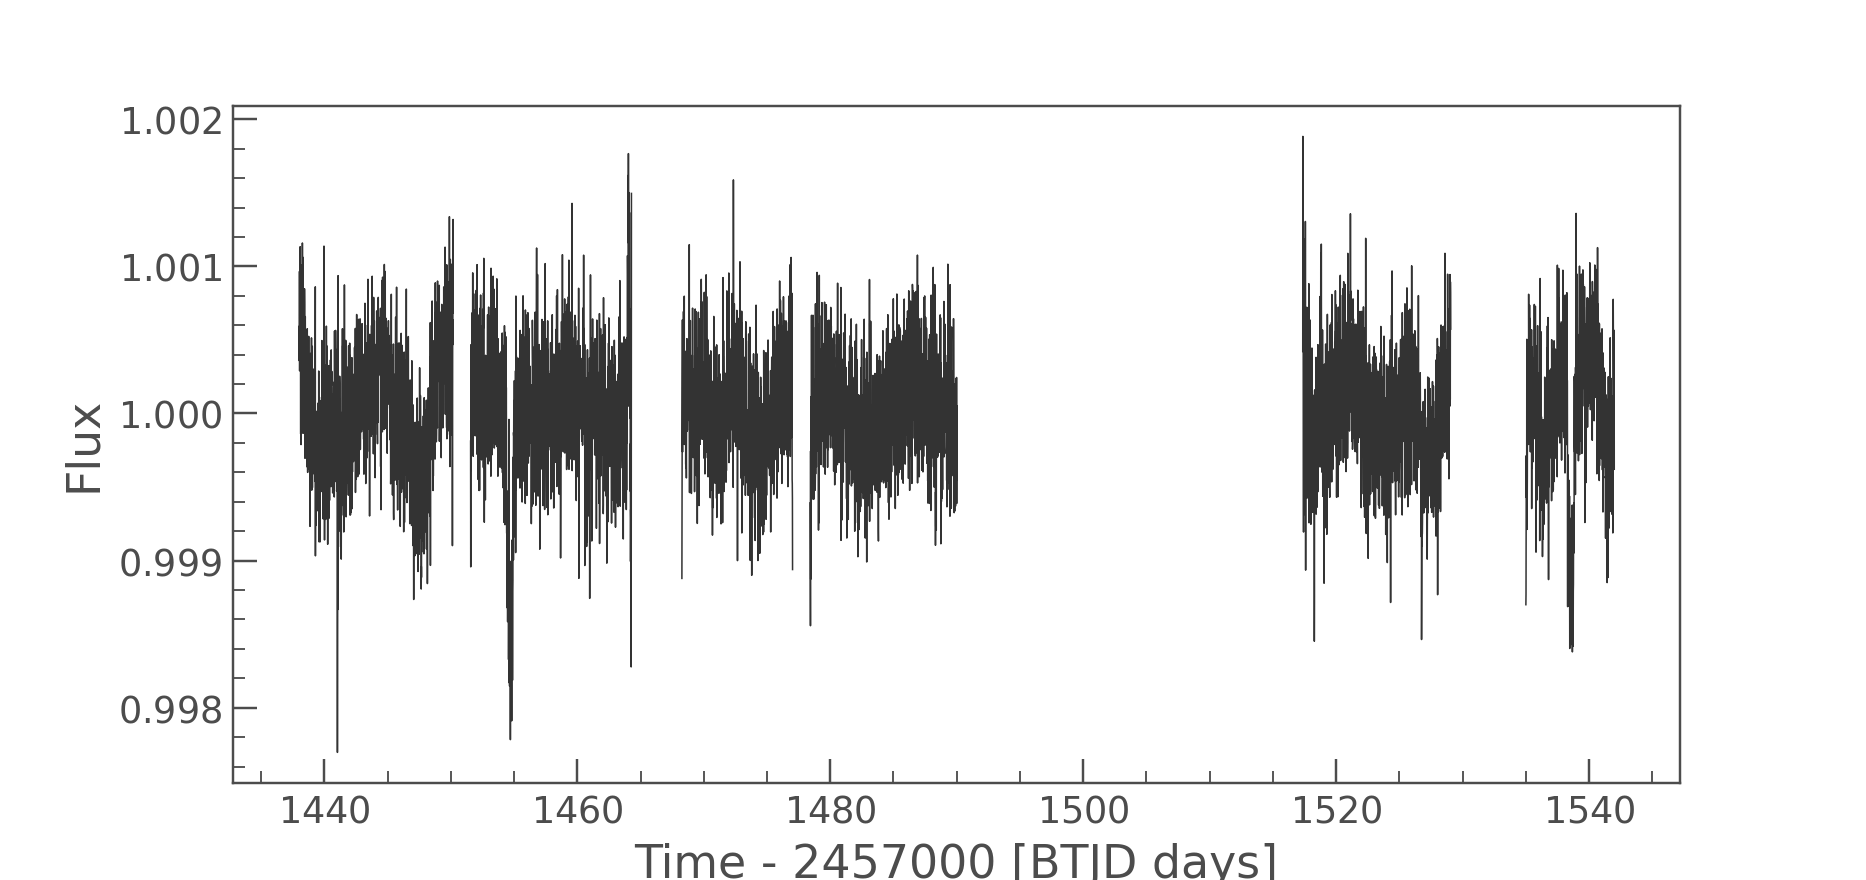

In [9]:
#plot the binned data
lc_collection_binned.plot()

<IPython.core.display.Javascript object>


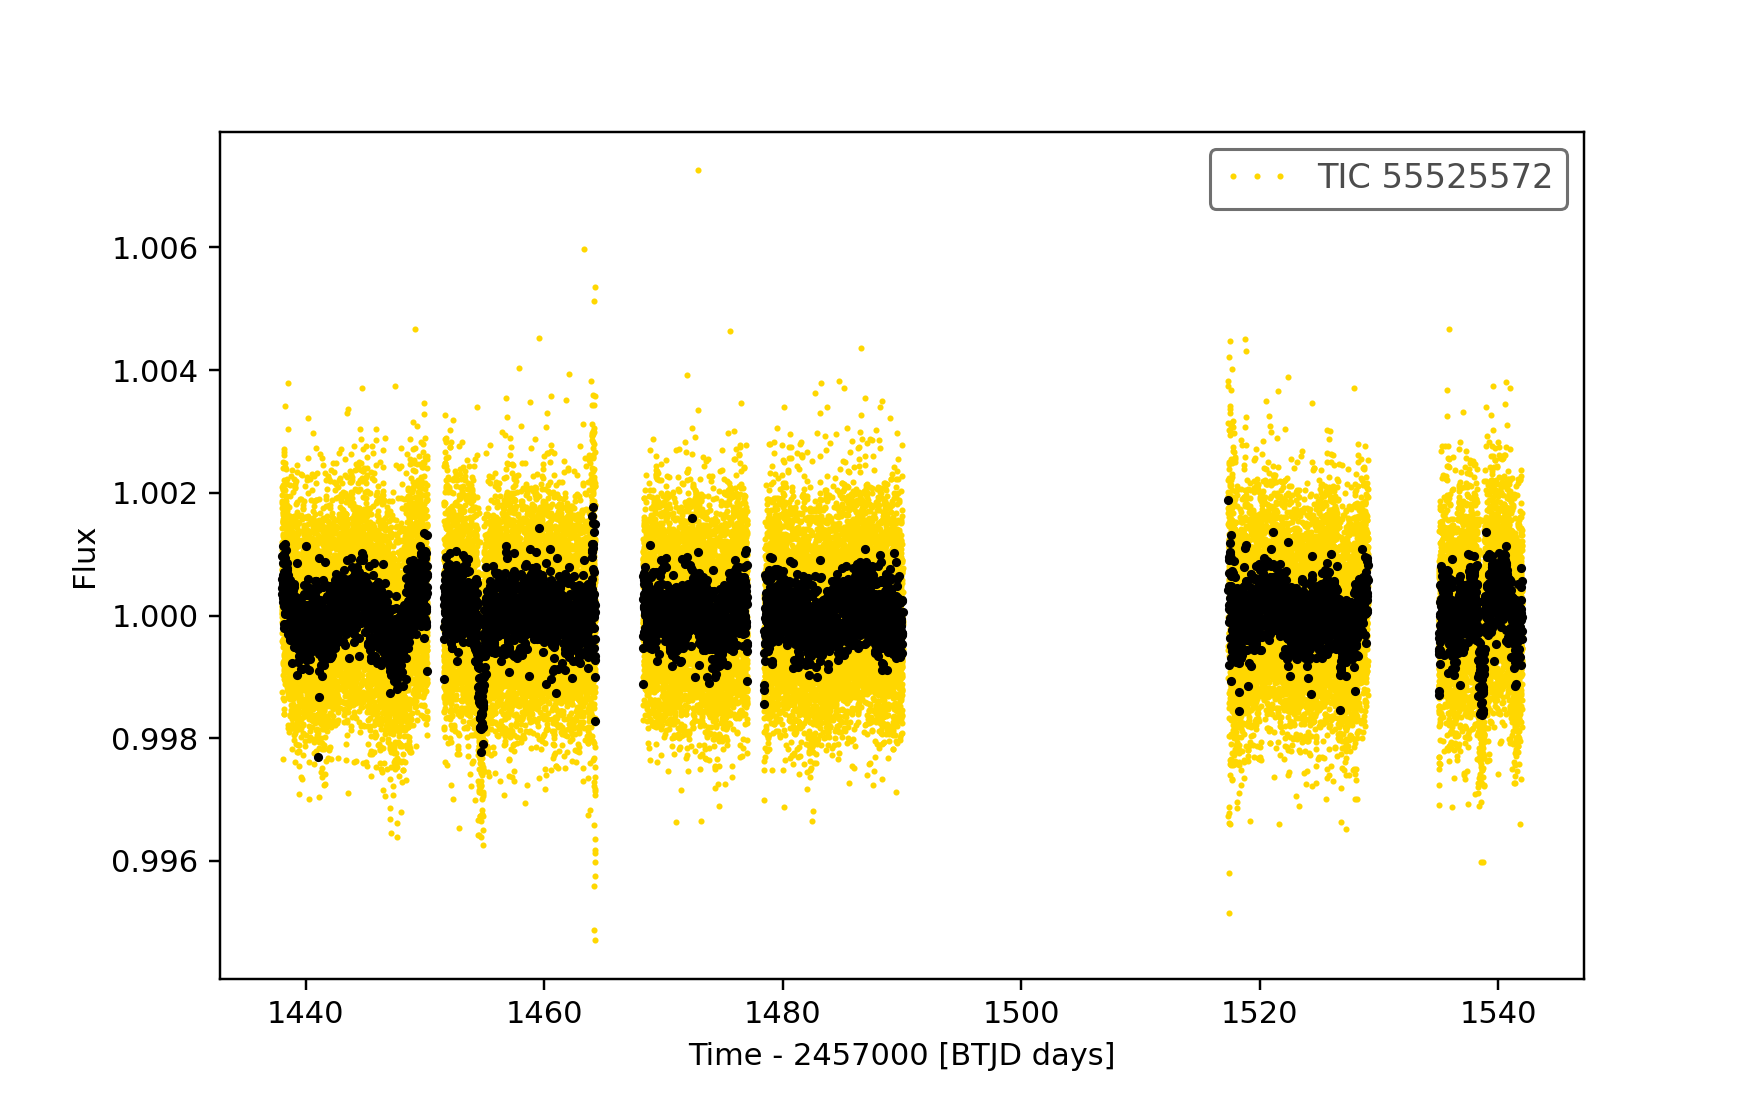

In [20]:
# plot the binned and unbinned data on the same axes
# to do that we need to define a figure (fig) and axes (ax) using the matplotlib library
fig, ax = plt.subplots(figsize = (8,5))

# now plot both the binned and unbinned data (you have to tell the code to plot it on the axes using ax =ax)
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1)
lc_collection_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'black', markersize = 2)

# delete the hashtag from the below two commands to zoom in on just a single transit 
#plt.xlim(1453.5, 1456)
#plt.ylim(0.996,1.004)

In [21]:
# try this for a different target!